In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
ratio = [0.2]
seed = [12, 13, 17, 18, 29, 32, 50, 58, 77, 87]

#seed = [12, 17, 18, 29, 32, 41, 50, 58, 77, 87]
noniid = 0.4
where='fmnist'
where_origin='fmnist_origin'
epoch = 20

label_pre_round = [[] for i in range(len(seed))]


chosen_model = []

'''
# for mnist
if(ratio[0]<=0.1):
    target_label = [7]
elif(ratio[0]<=0.2):
    target_label = [7,3]
elif(ratio[0]<=0.3):
    target_label = [7,3,5]
elif(ratio[0]<=0.4):
    target_label = [7,3,5,1]
elif(ratio[0]<=0.5):
    target_label = [7,3,5,1,9]
'''


# for fmnist
if(ratio[0]<=0.1):
    target_label = [2]
elif(ratio[0]<=0.2):
    target_label = [2,4]
elif(ratio[0]<=0.3):
    target_label = [2,4,0]
elif(ratio[0]<=0.4):
    target_label = [2,4,0,3]
elif(ratio[0]<=0.5):
    target_label = [2,4,0,3,6]


for s in range(len(seed)):
    for r in ratio:
        path = '/mnt/d/My_FL/My_FL/src/' + where + '/seed_' + str(seed[s]) + '/' + '/noniid_' + str(noniid) + '/ratio_' + str(r) + '/pre.txt'
        with open(path) as f:
            line = f.read()
            tmp = line.find("pt1")-3
            chosen_model.append(int(line[tmp]))

            
for s in range(len(seed)):
    for r in ratio:
        path = '/mnt/d/My_FL/My_FL/src/' + where + '/seed_' + str(seed[s]) + '/' + '/noniid_' + str(noniid) + '/ratio_' + str(r) + '/c.txt'
        with open(path) as f:
            lines = f.readlines()
            for line in range(len(lines)):
                if (line%10)==chosen_model[s]:
                    label_pre_round[s].append(lines[line])
    
    for i in range(len(label_pre_round[s])):
        label_pre_round[s][i] = eval(label_pre_round[s][i].split(":")[1])
        tmp = []
        for j in target_label:
            tmp.append(label_pre_round[s][i][j])
        label_pre_round[s][i] = min(tmp)
            

In [20]:
print(len(label_pre_round[0]))
print(label_pre_round[0])

20
[0.023000000044703484, 0.15800000727176666, 0.328000009059906, 0.4950000047683716, 0.5329999923706055, 0.6039999723434448, 0.42899999022483826, 0.40700000524520874, 0.3720000088214874, 0.4350000023841858, 0.5210000276565552, 0.5559999942779541, 0.5759999752044678, 0.6430000066757202, 0.6489999890327454, 0.6330000162124634, 0.6859999895095825, 0.6589999794960022, 0.6890000104904175, 0.6700000166893005]


In [21]:
label_log_round = [[] for i in range(len(seed))]
label_origin_round = [[] for i in range(len(seed))]
            
for s in range(len(seed)):
    for r in ratio:
        path = '/mnt/d/My_FL/My_FL/src/' + where + '/seed_' + str(seed[s]) + '/' + '/noniid_' + str(noniid) + '/ratio_' + str(r) + '/d.txt'
        path2 = '/mnt/d/My_FL/My_FL/src/' + where_origin + '/seed_' + str(seed[s]) + '/' + '/noniid_' + str(noniid) + '/ratio_' + str(r) + '/f.txt'
        with open(path) as f:
            lines = f.readlines()
            for line in range(len(lines)):
                label_log_round[s].append(lines[line])
                
        with open(path2) as f:
            lines = f.readlines()
            for line in range(len(lines)):
                label_origin_round[s].append(lines[line])
    
    for i in range(len(label_log_round[s])):
        label_log_round[s][i] = eval(label_log_round[s][i].split(":")[1])
        tmp = []
        for j in target_label:
            tmp.append(label_log_round[s][i][j])
        label_log_round[s][i] = min(tmp)
        
    for i in range(len(label_origin_round[s])):
        label_origin_round[s][i] = eval(label_origin_round[s][i].split(":")[1])
        tmp = []
        for j in target_label:
            tmp.append(label_origin_round[s][i][j])
        label_origin_round[s][i] = min(tmp)

In [22]:
print(len(label_log_round[0]))
print(label_log_round[0])
print(len(label_origin_round[0]))
print(label_origin_round[0])

80
[0.6389999985694885, 0.6349999904632568, 0.6690000295639038, 0.6359999775886536, 0.7070000171661377, 0.6510000228881836, 0.6859999895095825, 0.6840000152587891, 0.6759999990463257, 0.6809999942779541, 0.6819999814033508, 0.7319999933242798, 0.7070000171661377, 0.6980000138282776, 0.7110000252723694, 0.6850000023841858, 0.6830000281333923, 0.7049999833106995, 0.6589999794960022, 0.7089999914169312, 0.7120000123977661, 0.7170000076293945, 0.7099999785423279, 0.7089999914169312, 0.7319999933242798, 0.7020000219345093, 0.7229999899864197, 0.6970000267028809, 0.7120000123977661, 0.6919999718666077, 0.7099999785423279, 0.6919999718666077, 0.7310000061988831, 0.7149999737739563, 0.7329999804496765, 0.7360000014305115, 0.7160000205039978, 0.75, 0.6859999895095825, 0.6669999957084656, 0.7070000171661377, 0.6930000185966492, 0.7200000286102295, 0.6980000138282776, 0.7210000157356262, 0.7590000033378601, 0.7400000095367432, 0.7540000081062317, 0.7429999709129333, 0.7369999885559082, 0.73900002

In [23]:
label_hundred_round = [[] for i in range(len(seed))]

for s in range(len(seed)):
    label_hundred_round[s].extend(label_pre_round[s])
    label_hundred_round[s].extend(label_log_round[s])

In [24]:
print(len(label_hundred_round[0]))
print(label_hundred_round[0])

100
[0.023000000044703484, 0.15800000727176666, 0.328000009059906, 0.4950000047683716, 0.5329999923706055, 0.6039999723434448, 0.42899999022483826, 0.40700000524520874, 0.3720000088214874, 0.4350000023841858, 0.5210000276565552, 0.5559999942779541, 0.5759999752044678, 0.6430000066757202, 0.6489999890327454, 0.6330000162124634, 0.6859999895095825, 0.6589999794960022, 0.6890000104904175, 0.6700000166893005, 0.6389999985694885, 0.6349999904632568, 0.6690000295639038, 0.6359999775886536, 0.7070000171661377, 0.6510000228881836, 0.6859999895095825, 0.6840000152587891, 0.6759999990463257, 0.6809999942779541, 0.6819999814033508, 0.7319999933242798, 0.7070000171661377, 0.6980000138282776, 0.7110000252723694, 0.6850000023841858, 0.6830000281333923, 0.7049999833106995, 0.6589999794960022, 0.7089999914169312, 0.7120000123977661, 0.7170000076293945, 0.7099999785423279, 0.7089999914169312, 0.7319999933242798, 0.7020000219345093, 0.7229999899864197, 0.6970000267028809, 0.7120000123977661, 0.691999971

In [25]:
label_mean_round = np.mean(np.array(label_hundred_round),0)
label_origin_mean_round = np.mean(np.array(label_origin_round),0)
print(len(label_mean_round))
print(label_mean_round)
label_std_round = np.std(np.array(label_hundred_round),0)
label_origin_std_round = np.std(np.array(label_origin_round),0)
print(len(label_std_round))
print(label_std_round)
label_max_round = label_mean_round + label_std_round
label_min_round = label_mean_round - label_std_round

tmp = np.max(np.array(label_hundred_round),0)
tmp2 = np.min(np.array(label_hundred_round),0)
for i in range(len(label_max_round)):
    if(tmp[i]<label_max_round[i]):
        label_max_round[i] = tmp[i]
    if(tmp2[i]>label_min_round[i]):
        label_min_round[i] = tmp2[i]


label_origin_max_round = label_origin_mean_round + label_origin_std_round
label_origin_min_round = label_origin_mean_round - label_origin_std_round

tmp = np.max(np.array(label_origin_round),0)
tmp2 = np.min(np.array(label_origin_round),0)
for i in range(len(label_origin_max_round)):
    if(tmp[i]<label_origin_max_round[i]):
        label_origin_max_round[i] = tmp[i]
    if(tmp2[i]>label_origin_min_round[i]):
        label_origin_min_round[i] = tmp2[i]


100
[0.0662     0.2653     0.36750001 0.39070001 0.4361     0.4642
 0.4917     0.5296     0.5238     0.5446     0.5626     0.5625
 0.6022     0.64229999 0.62029999 0.6274     0.6525     0.6456
 0.6716     0.689      0.67340001 0.68659999 0.67390001 0.68559999
 0.6809     0.6818     0.6943     0.696      0.6796     0.68929999
 0.69139999 0.7033     0.6887     0.71000001 0.7084     0.6964
 0.7025     0.70629999 0.696      0.7077     0.7228     0.71209999
 0.70859999 0.71       0.7113     0.7095     0.71109999 0.71709999
 0.7226     0.71710001 0.72229999 0.7059     0.72       0.71479999
 0.72       0.7114     0.7143     0.7281     0.7072     0.719
 0.7066     0.71       0.71389999 0.716      0.7155     0.71709999
 0.72570001 0.73010001 0.7295     0.7256     0.71660001 0.7137
 0.7089     0.70899999 0.72310001 0.7064     0.7238     0.7153
 0.7355     0.7297     0.72200001 0.7191     0.72729999 0.7284
 0.7284     0.7211     0.7352     0.716      0.72560001 0.72499999
 0.7215     0.7344     0

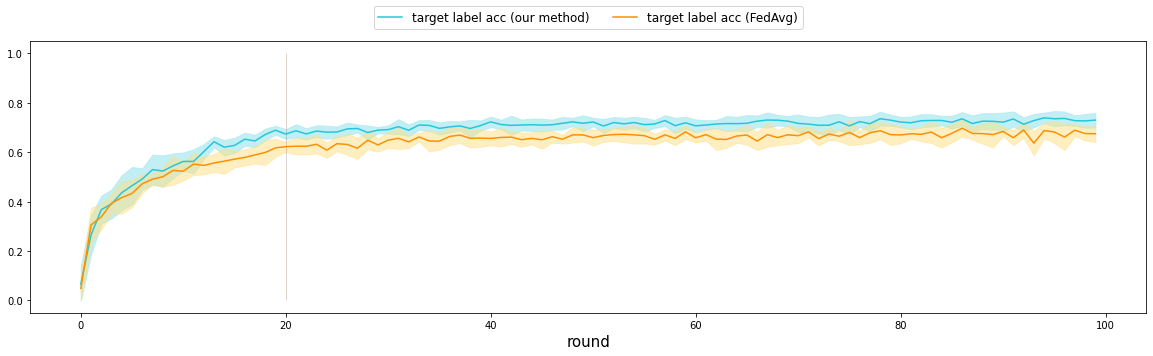

In [26]:
round = [i for i in range(100)]
fig, ax = plt.subplots(figsize=(20,5))
ax.set_xlabel("round",fontsize=15)

ax.plot(round, label_mean_round, c = '#26C6DA', label='target label acc (our method)')
ax.fill_between(round, label_max_round, label_min_round, color = "#B2EBF2", alpha=0.8)

ax.plot(round, label_origin_mean_round, c = '#FF8F00', label='target label acc (FedAvg)')
ax.fill_between(round, label_origin_max_round, label_origin_min_round, color = "#FFE082", alpha=0.5)

ax.legend(loc='upper center',bbox_to_anchor =(0.5, 1.15),ncol=4,fontsize=12)
label_num_round = []

for p in label_pre_round:
    label_num_round.append(len(p))

label_num_round = np.array(label_num_round)

label_change = [i for i in range(int(np.mean(label_num_round)-np.std(label_num_round)),int(np.mean(label_num_round)+np.std(label_num_round)))]
if(label_change==[]):
    label_change.append(np.mean(label_num_round))
ax.fill_between(label_change, 1, np.min(label_origin_min_round), color = "#8D6E63",alpha=0.3)

In [26]:
name = './fmnist/noniid_' + str(noniid) +'_ratio_' + str(r) + '_targetacc.png'
fig.savefig(name)

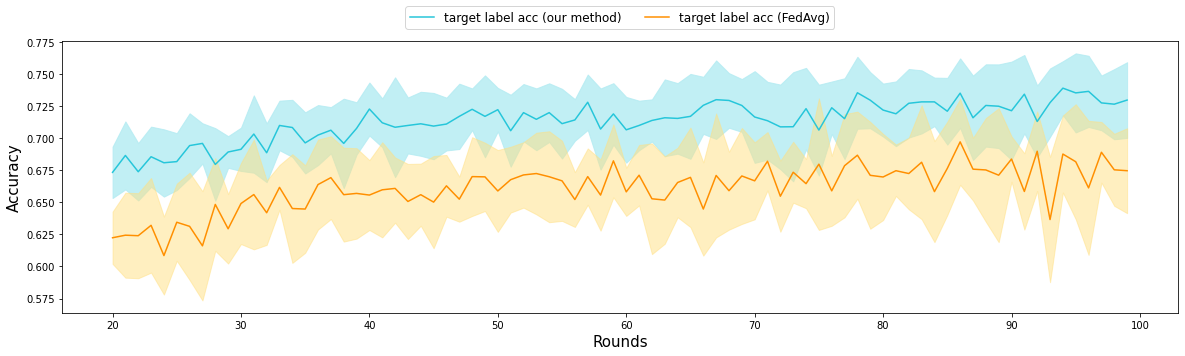

In [27]:
round = [i for i in range(20,100)]
fig, ax = plt.subplots(figsize=(20,5))
ax.set_xlabel("Rounds",fontsize=15)
ax.set_ylabel("Accuracy",fontsize=15)

ax.plot(round, label_mean_round[20:], c = '#26C6DA', label='target label acc (our method)')
ax.fill_between(round, label_max_round[20:], label_min_round[20:], color = "#B2EBF2", alpha=0.8)

ax.plot(round, label_origin_mean_round[20:], c = '#FF8F00', label='target label acc (FedAvg)')
ax.fill_between(round, label_origin_max_round[20:], label_origin_min_round[20:], color = "#FFE082", alpha=0.5)

ax.legend(loc='upper center',bbox_to_anchor =(0.5, 1.15),ncol=4,fontsize=12)
label_num_round = []

for p in label_pre_round:
    label_num_round.append(len(p))

label_num_round = np.array(label_num_round)

label_change = [i for i in range(int(np.mean(label_num_round)-np.std(label_num_round)),int(np.mean(label_num_round)+np.std(label_num_round)))]
if(label_change==[]):
    label_change.append(np.mean(label_num_round))
#ax.fill_between(label_change, 1, np.min(label_origin_min_round), color = "#8D6E63",alpha=0.3)